## ETL de Vendas

### 0. Pré instalações

In [4]:
!pip install requests
!pip install pandas
!pip install numpy
!pip install matplotlib

### 1. Extração

In [5]:
import requests
import pandas as pd
import numpy as np

In [6]:
url = "https://dummyjson.com/carts"

response = requests.get(url)
if response.status_code != 200:
  raise Exception(f"Erro ao acessar API: {response.status_code}")
else:
  carts = response.json()['carts']

In [7]:
print("Exemplo de dados extraídos: ")
print(carts[0])

Exemplo de dados extraídos: 
{'id': 1, 'products': [{'id': 168, 'title': 'Charger SXT RWD', 'price': 32999.99, 'quantity': 3, 'total': 98999.97, 'discountPercentage': 13.39, 'discountedTotal': 85743.87, 'thumbnail': 'https://cdn.dummyjson.com/products/images/vehicle/Charger%20SXT%20RWD/thumbnail.png'}, {'id': 78, 'title': 'Apple MacBook Pro 14 Inch Space Grey', 'price': 1999.99, 'quantity': 2, 'total': 3999.98, 'discountPercentage': 18.52, 'discountedTotal': 3259.18, 'thumbnail': 'https://cdn.dummyjson.com/products/images/laptops/Apple%20MacBook%20Pro%2014%20Inch%20Space%20Grey/thumbnail.png'}, {'id': 183, 'title': 'Green Oval Earring', 'price': 24.99, 'quantity': 5, 'total': 124.94999999999999, 'discountPercentage': 6.28, 'discountedTotal': 117.1, 'thumbnail': 'https://cdn.dummyjson.com/products/images/womens-jewellery/Green%20Oval%20Earring/thumbnail.png'}, {'id': 100, 'title': 'Apple Airpods', 'price': 129.99, 'quantity': 5, 'total': 649.95, 'discountPercentage': 12.84, 'discountedT

### 2. Transformação

In [8]:
# Normalização dos dados
extended_data = []
for cart in carts:
    for product in cart['products']:
        extended_data.append({
            'Carrinho_ID': cart['id'],
            'Usuario_ID': cart['userId'],
            'Produto_ID': product['id'],
            'Produto_Nome': product['title'],
            'Quantidade': product['quantity'],
            'Preco_Unitario': product['price'],
            'Total_Item': product['price'] * product['quantity'],
            'Desconto_Total': cart['discountedTotal'],
            'Data_Venda': pd.Timestamp.now().normalize()  # Simulação da data atual
        })

In [10]:
df_vendas = pd.DataFrame(extended_data)
df_vendas

,Carrinho_ID,Usuario_ID,Produto_ID,Produto_Nome,Quantidade,Preco_Unitario,Total_Item,Desconto_Total,Data_Venda
0,1,33,168,Charger SXT RWD,3,32999.99,98999.97,89686.65,2025-04-29
1,1,33,78,Apple MacBook Pro 14 Inch Space Grey,2,1999.99,3999.98,89686.65,2025-04-29
2,1,33,183,Green Oval Earring,5,24.99,124.95,89686.65,2025-04-29
3,1,33,100,Apple Airpods,5,129.99,649.95,89686.65,2025-04-29
4,2,142,144,Cricket Helmet,4,44.99,179.96,4288.95,2025-04-29
...,...,...,...,...,...,...,...,...,...
116,29,170,153,Volleyball,5,11.99,59.95,3488.44,2025-04-29
117,30,177,181,Marni Red & Black Suit,1,179.99,179.99,118740.76,2025-04-29
118,30,177,171,Pacifica Touring,4,31999.99,127999.96,118740.76,2025-04-29
119,30,177,35,Potatoes,4,2.29,9.16,118740.76,2025-04-29


Transformações Adicionais.

In [11]:
# Correção dos tipos dos dados
df_vendas['Quantidade'] = df_vendas['Quantidade'].astype(int)
df_vendas['Preco_Unitario'] = df_vendas['Preco_Unitario'].astype(float)
df_vendas['Total_Item'] = df_vendas['Total_Item'].astype(float)
df_vendas

,Carrinho_ID,Usuario_ID,Produto_ID,Produto_Nome,Quantidade,Preco_Unitario,Total_Item,Desconto_Total,Data_Venda
0,1,33,168,Charger SXT RWD,3,32999.99,98999.97,89686.65,2025-04-29
1,1,33,78,Apple MacBook Pro 14 Inch Space Grey,2,1999.99,3999.98,89686.65,2025-04-29
2,1,33,183,Green Oval Earring,5,24.99,124.95,89686.65,2025-04-29
3,1,33,100,Apple Airpods,5,129.99,649.95,89686.65,2025-04-29
4,2,142,144,Cricket Helmet,4,44.99,179.96,4288.95,2025-04-29
...,...,...,...,...,...,...,...,...,...
116,29,170,153,Volleyball,5,11.99,59.95,3488.44,2025-04-29
117,30,177,181,Marni Red & Black Suit,1,179.99,179.99,118740.76,2025-04-29
118,30,177,171,Pacifica Touring,4,31999.99,127999.96,118740.76,2025-04-29
119,30,177,35,Potatoes,4,2.29,9.16,118740.76,2025-04-29


In [12]:
# Classificação da compra
df_vendas['Classificacao_Venda'] = np.where(df_vendas['Total_Item'] >= 100, 'Alta', 'Baixa')

In [13]:
# Criação da Coluna do mês da venda
df_vendas['Mes_Venda'] = df_vendas['Data_Venda'].dt.month

In [32]:
df_vendas.head(10)

,Carrinho_ID,Usuario_ID,Produto_ID,Produto_Nome,Quantidade,Preco_Unitario,Total_Item,Desconto_Total,Data_Venda,Classificacao_Venda,Mes_Venda
0,1,33,168,Charger SXT RWD,3,32999.99,98999.97,89686.65,2025-04-29,Alta,4
1,1,33,78,Apple MacBook Pro 14 Inch Space Grey,2,1999.99,3999.98,89686.65,2025-04-29,Alta,4
2,1,33,183,Green Oval Earring,5,24.99,124.95,89686.65,2025-04-29,Alta,4
3,1,33,100,Apple Airpods,5,129.99,649.95,89686.65,2025-04-29,Alta,4
4,2,142,144,Cricket Helmet,4,44.99,179.96,4288.95,2025-04-29,Alta,4
5,2,142,124,iPhone X,4,899.99,3599.96,4288.95,2025-04-29,Alta,4
6,2,142,148,Golf Ball,4,9.99,39.96,4288.95,2025-04-29,Baixa,4
7,2,142,122,iPhone 6,3,299.99,899.97,4288.95,2025-04-29,Alta,4
8,2,142,110,Selfie Lamp with iPhone,5,14.99,74.95,4288.95,2025-04-29,Baixa,4
9,3,108,98,Rolex Submariner Watch,1,13999.99,13999.99,14144.30,2025-04-29,Alta,4


### 3. Carga

In [15]:
import os

In [16]:
# Exportar para CSV
caminho_arquivo = 'dados_tratados/vendas_dummyjson.csv'
os.makedirs(os.path.dirname(caminho_arquivo), exist_ok=True)
df_vendas.to_csv(caminho_arquivo, index=False)

print(f"Arquivo CSV salvo com sucesso em : {caminho_arquivo}")

Arquivo CSV salvo com sucesso em : dados_tratados/vendas_dummyjson.csv


### 4. Análise Visuais (Gráficos)

In [82]:
import matplotlib.pyplot as plt

plt.style.use('tableau-colorblind10')

os.makedirs('graficos', exist_ok=True)

#### Receita Total por mês

In [84]:
revenue_per_month = df_vendas.groupby('Mes_Venda')['Total_Item'].sum()
revenue_per_month = revenue_per_month.sort_index()

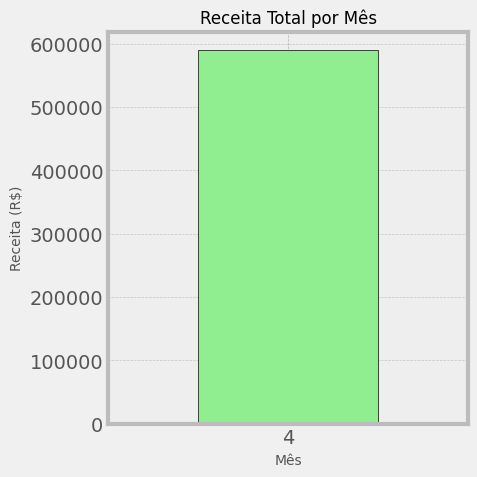

In [92]:
plt.figure(figsize = (5,5))
revenue_per_month.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Receita Total por Mês', fontsize=12)
plt.xlabel('Mês', fontsize=10)
plt.ylabel('Receita (R$)', fontsize=10)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('graficos/receita_por_mes.png')
plt.show()

Top Produtos mais Vendidos

In [86]:
top_products = df_vendas.groupby('Produto_Nome')['Quantidade'].sum().sort_values(ascending = False).head(5)

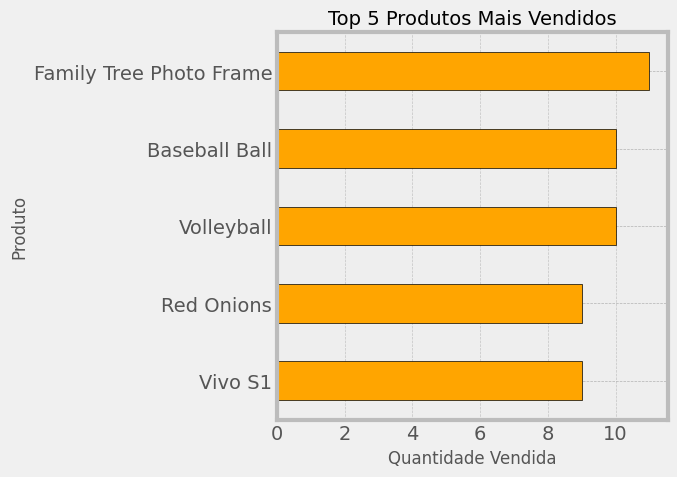

In [91]:
plt.figure(figsize = (7,5))
top_products.plot(kind = 'barh', color = 'orange', edgecolor = 'black')
plt.title('Top 5 Produtos Mais Vendidos', fontsize=14)
plt.xlabel('Quantidade Vendida', fontsize=12)
plt.ylabel('Produto', fontsize=12)
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('graficos/top_produtos.png')
plt.show()